In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.optimize import curve_fit

import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

import algorithms as a
import force_functions as f

In [107]:
T1 = np.array([[0., 0., 0., 1.], 
               [1., 0., 0., 0.], 
               [0., 1., 0., 0.], 
               [0., 0., 1., 0.]])
print(T1)

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [108]:
eigvals1, eigvecs1 = np.linalg.eig(T1)

In [109]:
print(eigvals1)

[-1.00000000e+00+0.j  5.55111512e-17+1.j  5.55111512e-17-1.j
  1.00000000e+00+0.j]


In [110]:
for i in range(len(eigvals1)):
    print(eigvecs1[:,i])

[-0.5+0.j  0.5+0.j -0.5+0.j  0.5+0.j]
[ 5.00000000e-01+0.0000000e+00j -6.24500451e-17-5.0000000e-01j
 -5.00000000e-01-6.9388939e-17j -2.01227923e-16+5.0000000e-01j]
[ 5.00000000e-01-0.0000000e+00j -6.24500451e-17+5.0000000e-01j
 -5.00000000e-01+6.9388939e-17j -2.01227923e-16-5.0000000e-01j]
[-0.5+0.j -0.5+0.j -0.5+0.j -0.5+0.j]


In [111]:
print(eigvecs1[:, eigvals1.argmax()])

[-0.5+0.j -0.5+0.j -0.5+0.j -0.5+0.j]


In [112]:
spectrum1 = np.zeros([len(eigvals1), 2])
spectrum1[:, 0] = np.real(eigvals1)
spectrum1[:, 1] = np.imag(eigvals1)

In [113]:
np.linalg.matrix_power(T1, 5)

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [114]:
for i in range(4):
    print(np.linalg.eig(T1.T)[0][i])
    print(np.linalg.eig(T1.T)[1][:,i])
    print('\n')

(-1.0000000000000004+0j)
[-0.5+0.j  0.5+0.j -0.5+0.j  0.5+0.j]


(5.551115123125783e-17+0.9999999999999997j)
[ 5.00000000e-01+0.0000000e+00j -2.01227923e-16+5.0000000e-01j
 -5.00000000e-01-6.9388939e-17j -6.24500451e-17-5.0000000e-01j]


(5.551115123125783e-17-0.9999999999999997j)
[ 5.00000000e-01-0.0000000e+00j -2.01227923e-16-5.0000000e-01j
 -5.00000000e-01+6.9388939e-17j -6.24500451e-17+5.0000000e-01j]


(0.9999999999999999+0j)
[-0.5+0.j -0.5+0.j -0.5+0.j -0.5+0.j]




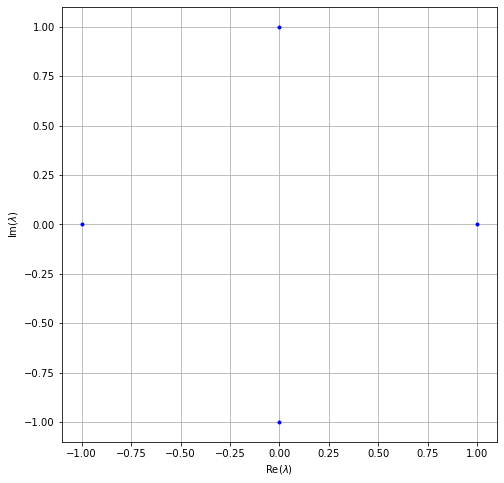

In [33]:
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(spectrum1[:, 0], spectrum1[:, 1], 'b.')
ax1.set_xlabel(r'Re($\lambda$)')
ax1.set_ylabel(r'Im($\lambda$)')
ax1.grid(True)
ax1.set_aspect('equal')
plt.savefig('./figures/spectrum1.png', dpi=300, bbox_inches='tight')
plt.show()

In [86]:
T2 = np.array([[0., 0., 0., 1.], 
               [1/3., 0., 0., 0.], 
               [1/3., 1., 0., 0.], 
               [1/3., 0., 1., 0.]])
print(T2)

[[0.         0.         0.         1.        ]
 [0.33333333 0.         0.         0.        ]
 [0.33333333 1.         0.         0.        ]
 [0.33333333 0.         1.         0.        ]]


In [87]:
eigvals2, eigvecs2 = np.linalg.eig(T2)

In [88]:
print(eigvals2)

[ 1.        +0.j         -0.71805717+0.j         -0.14097142+0.66659032j
 -0.14097142-0.66659032j]


In [89]:
for i in range(len(eigvals2)):
    print(eigvecs2[:,i])

[0.62554324+0.j 0.20851441+0.j 0.41702883+0.j 0.62554324+0.j]
[ 0.75285378+0.j -0.34948647+0.j  0.13722474+0.j -0.54059205+0.j]
[-0.65750284+0.j          0.06655608+0.3147137j   0.49825765+0.12357132j
  0.09268911-0.43828503j]
[-0.65750284-0.j          0.06655608-0.3147137j   0.49825765-0.12357132j
  0.09268911+0.43828503j]


In [90]:
spectrum2 = np.zeros([len(eigvals2), 2])
spectrum2[:, 0] = np.real(eigvals2)
spectrum2[:, 1] = np.imag(eigvals2)

In [92]:
powers = [10, 50, 100, 500, 1000, 2000, 5000, 10000]
k = np.array(powers, dtype=np.float64)
Tk = []
for power in powers:
    Tk.append(np.linalg.matrix_power(T2, power))
    print(np.linalg.matrix_power(T2, power))
    print('\n')

[[0.34979424 0.33333333 0.34567901 0.30864198]
 [0.10288066 0.12345679 0.11111111 0.11522634]
 [0.218107   0.19753086 0.2345679  0.22633745]
 [0.32921811 0.34567901 0.30864198 0.34979424]]


[[0.33333335 0.33333328 0.33333337 0.33333331]
 [0.1111111  0.11111114 0.11111109 0.11111112]
 [0.22222223 0.22222222 0.22222223 0.22222222]
 [0.33333332 0.33333337 0.33333331 0.33333335]]


[[0.33333333 0.33333333 0.33333333 0.33333333]
 [0.11111111 0.11111111 0.11111111 0.11111111]
 [0.22222222 0.22222222 0.22222222 0.22222222]
 [0.33333333 0.33333333 0.33333333 0.33333333]]


[[0.33333333 0.33333333 0.33333333 0.33333333]
 [0.11111111 0.11111111 0.11111111 0.11111111]
 [0.22222222 0.22222222 0.22222222 0.22222222]
 [0.33333333 0.33333333 0.33333333 0.33333333]]


[[0.33333333 0.33333333 0.33333333 0.33333333]
 [0.11111111 0.11111111 0.11111111 0.11111111]
 [0.22222222 0.22222222 0.22222222 0.22222222]
 [0.33333333 0.33333333 0.33333333 0.33333333]]


[[0.33333333 0.33333333 0.33333333 0.33333333

In [55]:
A = T2 - np.eye(4)
A[3] = [1,1,1,1]
print(A)

[[-1.          0.          0.          1.        ]
 [ 0.33333333 -1.          0.          0.        ]
 [ 0.33333333  1.         -1.          0.        ]
 [ 1.          1.          1.          1.        ]]


In [56]:
ps = np.linalg.solve(A, [0,0,0,1])
print(ps)

[0.33333333 0.11111111 0.22222222 0.33333333]


In [105]:
for i in range(4):
    print(np.linalg.eig(T2.T)[0][i])
    print(np.linalg.eig(T2.T)[1][:,i])
    print('\n')

(0.9999999999999998+0j)
[-0.5+0.j -0.5+0.j -0.5+0.j -0.5+0.j]


(-0.7180571650604809+0j)
[-0.26729623+0.j  0.72196437+0.j -0.51841169+0.j  0.37224923+0.j]


(-0.14097141746975983+0.6665903189796912j)
[ 0.13876111-0.19223337j  0.74958467+0.j         -0.10567001+0.49966589j
 -0.31817599-0.14087722j]


(-0.14097141746975983-0.6665903189796912j)
[ 0.13876111+0.19223337j  0.74958467-0.j         -0.10567001-0.49966589j
 -0.31817599+0.14087722j]




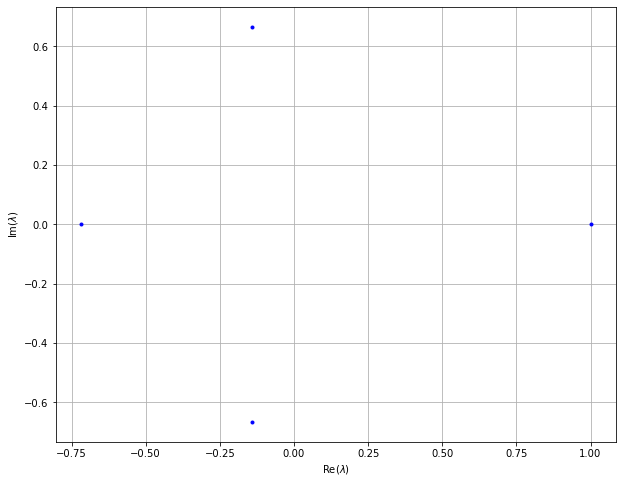

In [50]:
fig2, ax2 = plt.subplots(figsize=(12,8))
ax2.plot(spectrum2[:, 0], spectrum2[:, 1], 'b.')
ax2.set_xlabel(r'Re($\lambda$)')
ax2.set_ylabel(r'Im($\lambda$)')
ax2.grid(True)
ax2.set_aspect('equal')
plt.savefig('./figures/spectrum2.png', dpi=300, bbox_inches='tight')
plt.show()

In [58]:
T3 = np.array([[0., 0., 0., 1.], 
               [1/2., 0., 0., 0.], 
               [0., 1., 0., 0.], 
               [1/2., 0., 1., 0.]])
print(T3)

[[0.  0.  0.  1. ]
 [0.5 0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.5 0.  1.  0. ]]


In [59]:
eigvals3, eigvecs3 = np.linalg.eig(T3)

In [66]:
print(eigvals3)

[-1.0000000e+00+0.j          1.0000000e+00+0.j
  1.2490009e-16+0.70710678j  1.2490009e-16-0.70710678j]


In [60]:
spectrum3 = np.zeros([len(eigvals3), 2])
spectrum3[:, 0] = np.real(eigvals3)
spectrum3[:, 1] = np.imag(eigvals3)

In [62]:
A = T3 - np.eye(4)
A[3] = [1,1,1,1]
print(A)

[[-1.   0.   0.   1. ]
 [ 0.5 -1.   0.   0. ]
 [ 0.   1.  -1.   0. ]
 [ 1.   1.   1.   1. ]]


In [63]:
ps = np.linalg.solve(A, [0,0,0,1])
print(ps)

[0.33333333 0.16666667 0.16666667 0.33333333]


In [106]:
for i in range(4):
    print(np.linalg.eig(T3.T)[0][i])
    print(np.linalg.eig(T3.T)[1][:,i])
    print('\n')

(-0.9999999999999998+0j)
[ 0.5+0.j -0.5+0.j  0.5+0.j -0.5+0.j]


(0.9999999999999998+0j)
[-0.5+0.j -0.5+0.j -0.5+0.j -0.5+0.j]


(-4.163336342344337e-17+0.7071067811865477j)
[-3.15969867e-17-2.58198890e-01j  7.30296743e-01+0.00000000e+00j
 -4.43029087e-17+5.16397779e-01j -3.65148372e-01-5.46706185e-17j]


(-4.163336342344337e-17-0.7071067811865477j)
[-3.15969867e-17+2.58198890e-01j  7.30296743e-01-0.00000000e+00j
 -4.43029087e-17-5.16397779e-01j -3.65148372e-01+5.46706185e-17j]




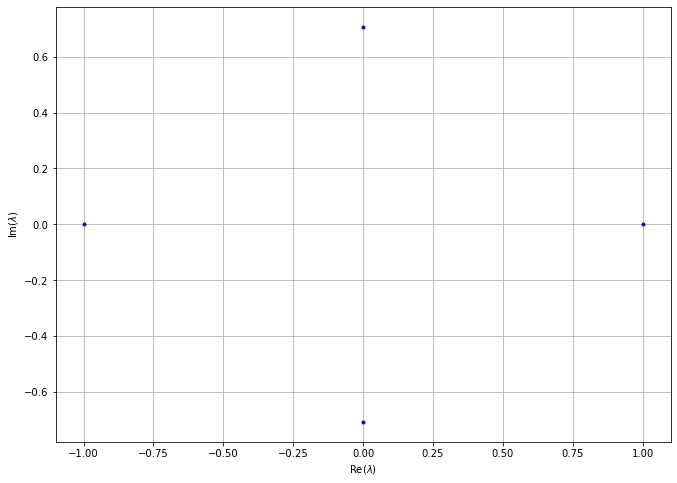

In [64]:
fig3, ax3 = plt.subplots(figsize=(12,8))
ax3.plot(spectrum3[:, 0], spectrum3[:, 1], 'b.')
ax3.set_xlabel(r'Re($\lambda$)')
ax3.set_ylabel(r'Im($\lambda$)')
ax3.grid(True)
ax3.set_aspect('equal')
plt.savefig('./figures/spectrum3.png', dpi=300, bbox_inches='tight')
plt.show()

In [59]:
A = T3 - np.eye(4)
A[3] = [1,1,1,1]
print(A)

[[-1.   0.   0.   1. ]
 [ 0.5 -1.   0.   0. ]
 [ 0.   1.  -1.   0. ]
 [ 1.   1.   1.   1. ]]


In [60]:
ps = np.linalg.solve(A, [0,0,0,1])
print(ps)

[0.33333333 0.16666667 0.16666667 0.33333333]


In [67]:
powers = [10, 50, 100, 500, 1000, 2000, 5000, 10000]
k = np.array(powers, dtype=np.float64)
Tk = []
for power in powers:
    Tk.append(np.linalg.matrix_power(T3, power))
    print(np.linalg.matrix_power(T3, power))
    print('\n')

[[0.65625 0.      0.6875  0.     ]
 [0.      0.3125  0.      0.34375]
 [0.34375 0.      0.3125  0.     ]
 [0.      0.6875  0.      0.65625]]


[[0.66666666 0.         0.66666669 0.        ]
 [0.         0.33333331 0.         0.33333334]
 [0.33333334 0.         0.33333331 0.        ]
 [0.         0.66666669 0.         0.66666666]]


[[0.66666667 0.         0.66666667 0.        ]
 [0.         0.33333333 0.         0.33333333]
 [0.33333333 0.         0.33333333 0.        ]
 [0.         0.66666667 0.         0.66666667]]


[[0.66666667 0.         0.66666667 0.        ]
 [0.         0.33333333 0.         0.33333333]
 [0.33333333 0.         0.33333333 0.        ]
 [0.         0.66666667 0.         0.66666667]]


[[0.66666667 0.         0.66666667 0.        ]
 [0.         0.33333333 0.         0.33333333]
 [0.33333333 0.         0.33333333 0.        ]
 [0.         0.66666667 0.         0.66666667]]


[[0.66666667 0.         0.66666667 0.        ]
 [0.         0.33333333 0.         0.33333333]

In [85]:
p0 = np.array([0., 0., 1., 0.])
pk = []
for i, power in enumerate(powers):
    pk.append(np.dot(np.linalg.matrix_power(T3, power), p0))
    print(pk[i])
    print(pk[i]-pk[i-1])
    print('\n')

[0.6875 0.     0.3125 0.    ]
[0. 0. 0. 0.]


[0.66666669 0.         0.33333331 0.        ]
[-0.02083331  0.          0.02083331  0.        ]


[0.66666667 0.         0.33333333 0.        ]
[-1.98682155e-08  0.00000000e+00  1.98682155e-08  0.00000000e+00]


[0.66666667 0.         0.33333333 0.        ]
[ 6.66133815e-16  0.00000000e+00 -5.55111512e-16  0.00000000e+00]


[0.66666667 0.         0.33333333 0.        ]
[0. 0. 0. 0.]


[0.66666667 0.         0.33333333 0.        ]
[0. 0. 0. 0.]


[0.66666667 0.         0.33333333 0.        ]
[0. 0. 0. 0.]


[0.66666667 0.         0.33333333 0.        ]
[0. 0. 0. 0.]


